
[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


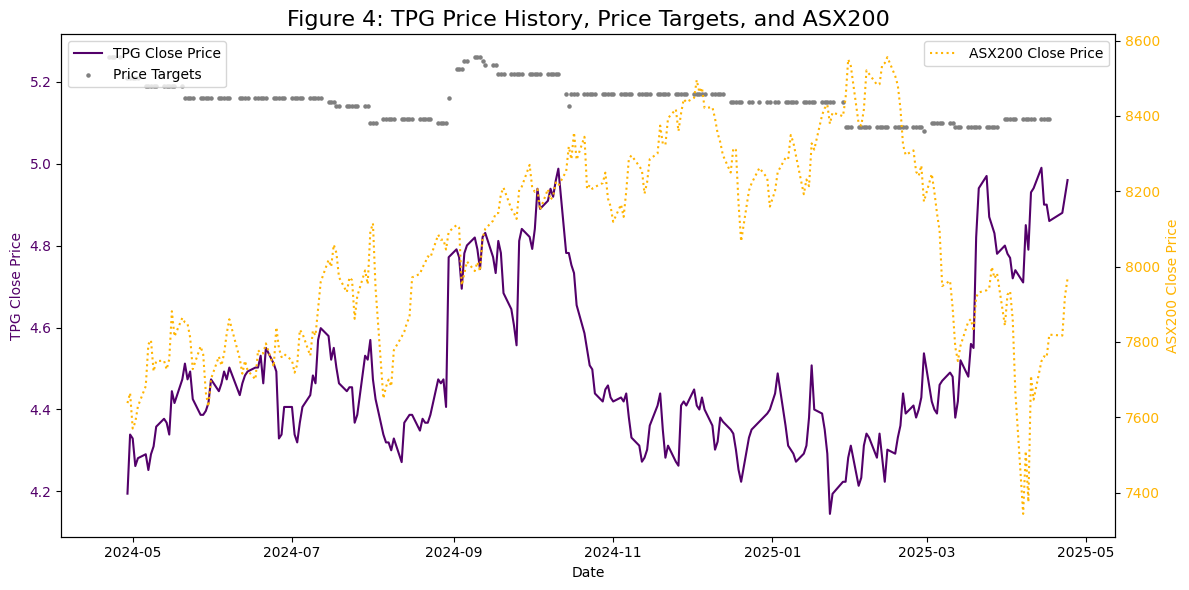

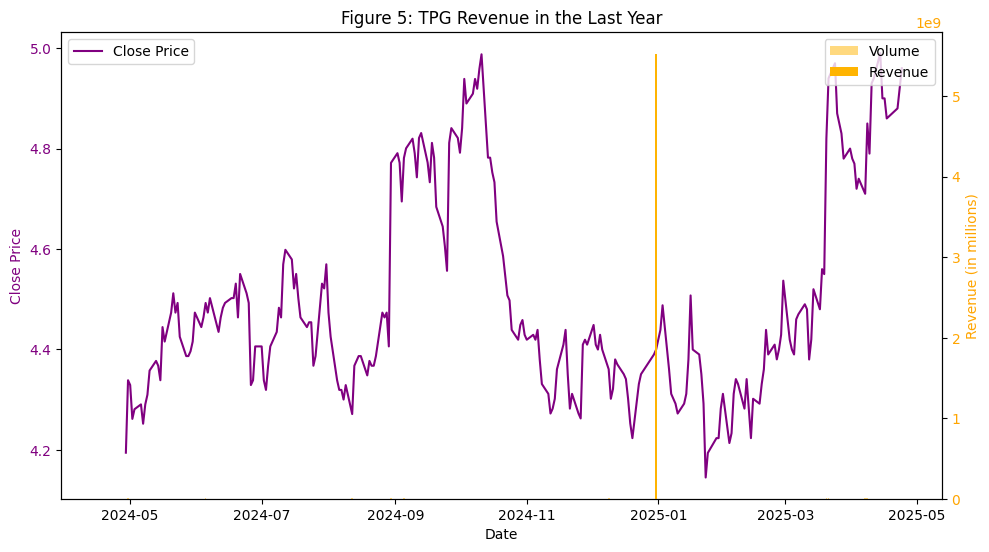

In [ ]:
#Install and import necessary Python libraries
!python3 -m pip install yfinance
!python3 -m pip install xlrd
!python3 -m pip install openpyxl
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Combined Graph: TPG Price History, Price Targets, and ASX200

# Create a figure and axis for the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Fetch TPG stock data
tpg = yf.download('TPG.AX', start='2024-04-28', end='2025-04-28')

# Fetch ASX200 index data
asx200 = yf.download('^AXJO', start='2024-04-28', end='2025-04-28')

# Load price targets from the Historical_Price_Targets.csv file
price_targets = pd.read_csv('Historical_Price_Targets.csv')
price_targets['Date'] = pd.to_datetime(price_targets['Date'])
price_targets.set_index('Date', inplace=True)

# Plot the TPG Close Price as a line graph
ax1.plot(tpg.index, tpg['Close'], color='#53006A', label='TPG Close Price')
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('TPG Close Price', color='#53006A')  # Set y-axis label for the first axis
ax1.tick_params(axis='y', labelcolor='#53006A')  # Set tick parameters for the first axis

# Plot the Price Targets as black dots
ax1.scatter(price_targets.index, price_targets['Price Target'], color='grey', label='Price Targets', zorder=5, s=5)

# Create a second y-axis for the ASX200
ax2 = ax1.twinx()
ax2.plot(asx200.index, asx200['Close'], color='#FFB401', linestyle='dotted', label='ASX200 Close Price')
ax2.set_ylabel('ASX200 Close Price', color='#FFB401')  # Set y-axis label for the second axis
ax2.tick_params(axis='y', labelcolor='#FFB401')  # Set tick parameters for the second axis

# Add a title and legends
plt.title('Figure 4: TPG Price History, Price Targets, and ASX200', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the combined graph
plt.savefig('combined_graph_tpg_asx200.png', bbox_inches='tight')
plt.show()

#Extra Graph for Cover Sheet: TPG Share Price and Volume (not required in the orginal task sheet)

# Load the TPG share price data from the Excel file
tpg_data = pd.read_excel('TPGsharepricedata.xls', sheet_name=0)

# Ensure the 'Date' column is in datetime format
tpg_data['Date'] = pd.to_datetime(tpg_data['Date'])

# Set the 'Date' column as the index
tpg_data.set_index('Date', inplace=True)

# Display the graph
plt.show()
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and axis for the first y-axis
ax1.plot(tpg.index, tpg['Close'], color='purple', label='Close Price')  # Plot the Close Price
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('Close Price', color='purple')  # Set y-axis label for the first axis
ax1.tick_params(axis='y', labelcolor='purple')  # Set tick parameters for the first axis

# Create a second y-axis for the volume
ax2 = ax1.twinx()
ax2.bar(tpg_data.index, tpg_data['Volume'], color='#FFB401', alpha=0.5, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
plt.title('Figure 1: TPG Share Price and Volume', y=-0.2)
fig.tight_layout()
# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Save the updated graph
plt.savefig('TPG share price and volume.png', bbox_inches='tight')
